In [18]:
import numpy as np
import matplotlib.pyplot as plt

### linear regression

In [19]:
m = -1.2
b = 2
data_size = 100

x = np.linspace(0, 10, data_size)
y = [(xi * m + b + np.random.random()) for xi in x]

In [20]:
m_res = 1
b_res = 1

starting abs err 9.676879288521375


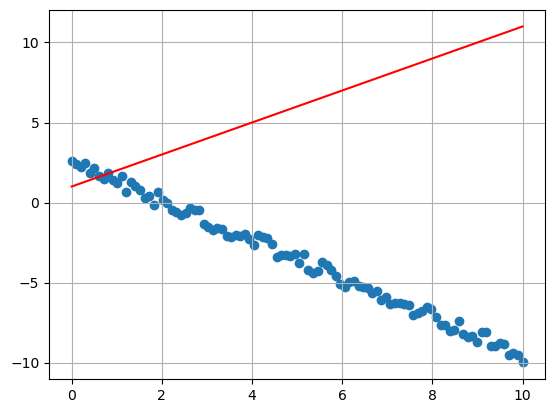

In [21]:
plt.scatter(x, y)
y_pred = [xi * m_res + b_res for xi in x]
plt.plot(x, y_pred, color='r')
plt.grid()

err_abs = np.sum([np.abs(y[i] - y_pred[i]) for i in range(data_size)]) / data_size
print(f'starting abs err {err_abs}')


In [22]:
# how to change m and b values to better fit the data
m_change = np.mean([x[i] * np.sign(y[i] - y_pred[i]) for i in range(data_size)])
print(f'm_change = {m_change}')

b_change =  np.mean([np.sign(y[i] - y_pred[i]) for i in range(data_size)])
print(f'b_change  {b_change}')

m_change = -4.941414141414142
b_change  -0.84


In [23]:
iter_cnt = 0
delta = 0.01  # learning rate

while err_abs > 0.3 and iter_cnt < 100:
    iter_cnt += 1
    m_change = np.mean([x[i] * np.sign(y[i] - y_pred[i]) for i in range(data_size)]).round(4)
    b_change = np.mean([np.sign(y[i] - y_pred[i]) for i in range(data_size)]).round(4)
    
    if iter_cnt % 10 == 0:
        print(f'iter {iter_cnt}: m_change = {m_change}, b_change  {b_change}')
    
    m_res += m_change * delta
    b_res += b_change * delta
    
    y_pred = [xi * m_res + b_res for xi in x]
    
    err_abs = np.sum([np.abs(y[i] - y_pred[i]) for i in range(data_size)]) / data_size

iter 10: m_change = -4.9051, b_change  -0.8
iter 20: m_change = -4.8121, b_change  -0.72
iter 30: m_change = -4.5697, b_change  -0.58
iter 40: m_change = -2.8364, b_change  -0.08
iter 50: m_change = -0.2404, b_change  0.36
iter 60: m_change = 0.2162, b_change  0.42
iter 70: m_change = -0.0566, b_change  0.38
iter 80: m_change = -0.0566, b_change  0.38
iter 90: m_change = -0.0566, b_change  0.38
iter 100: m_change = -0.0566, b_change  0.38


m_intial = -1.2, b_initial = 2
m_res = -0.9870019999999974, b_res = 0.9514000000000016
err_abs = 0.6816594310277938


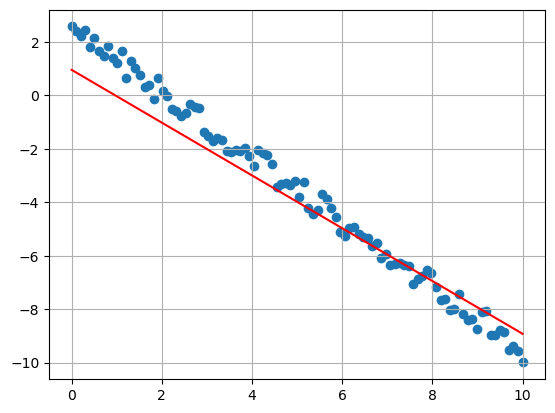

In [24]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.grid()

print(f'm_intial = {m}, b_initial = {b}')
print(f'm_res = {m_res}, b_res = {b_res}')
print(f'err_abs = {err_abs}')

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
linear_model = LinearRegression(copy_X=True )
linear_model.fit(x.reshape(-1,1), np.array(y).reshape(-1, 1))

LinearRegression()

In [27]:
linear_model.intercept_  # b

array([2.51388247])

### linear classifier

[ 1  1 -1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1
 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1
  1  1]


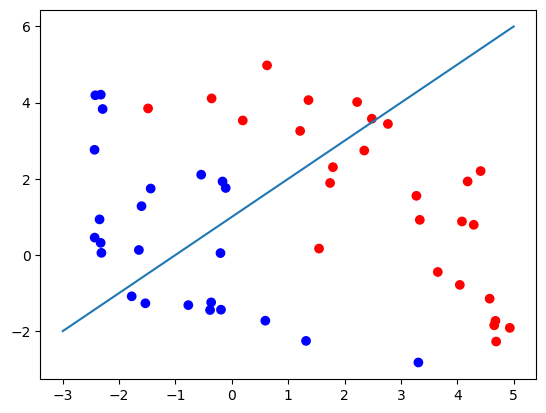

In [28]:
data_size = 50
x = [(np.random.uniform(-3, 5), np.random.uniform(-3, 5)) for _ in range(data_size)]
y = np.array([1 if xi[1] > (m * xi[0] + b) else -1 for xi in x])
print(y)

m_res = 1
b_res = 1

colors = np.where(y > 0, 'r', 'b')
plt.scatter([xi[0] for xi in x], [xi[1] for xi in x], c=colors)
x_g = np.linspace(-3, 5, data_size)
y_g = [m_res * xi + b_res for xi in x_g]
plt.plot(x_g, y_g)